In [2]:
from sn_solver import run

In [3]:
xs, mus, weights2, phi2 = run('example_input.json', S=2)
_, _, weights4, phi4 = run('example_input.json', S=4)
_, _, weights8, phi8 = run('example_input.json', S=8)
_, _, weights16, phi16 = run('example_input.json', S=16)
_, _, weights32, phi32 = run('example_input.json', S=32)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [9]:
p2 = np.sum(phi2.T * weights2, axis=1)
p4 = np.sum(phi4.T * weights4, axis=1)
p8 = np.sum(phi8.T * weights8, axis=1)
p16 = np.sum(phi16.T * weights16, axis=1)
p32 = np.sum(phi32.T * weights32, axis=1)

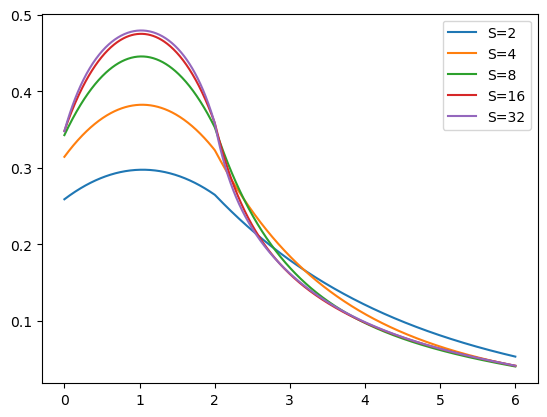

In [10]:
plt.plot(xs, p2, label='S=2')
plt.plot(xs, p4, label='S=4')
plt.plot(xs, p8, label='S=8')
plt.plot(xs, p16, label='S=16')
plt.plot(xs, p32, label='S=32')
plt.legend()

In [ ]:
xs2, mus, weights2, phi2 = run('example_input.json', N = 100)
xs3, _, weights3, phi3 = run('example_input.json', N = 1000)
xs4, _, weights4, phi4 = run('example_input.json', N = 10000)

In [15]:
xs5, _, weights5, phi5 = run('example_input.json', N = 100000)

In [16]:
p2 = np.sum(phi2.T * weights2, axis=1)
p3 = np.sum(phi3.T * weights3, axis=1)
p4 = np.sum(phi4.T * weights4, axis=1)
p5 = np.sum(phi5.T * weights5, axis=1)

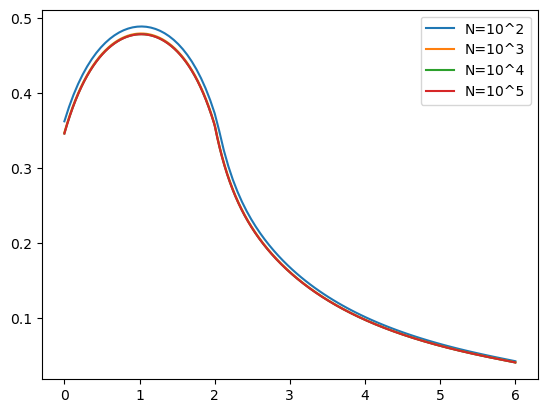

In [17]:
plt.plot(xs2, p2, label='N=10^2')
plt.plot(xs3, p3, label='N=10^3')
plt.plot(xs4, p4, label='N=10^4')
plt.plot(xs5, p5, label='N=10^5')
plt.legend()